# Score de Risco 

### Criado por João Teles e Rodrigo Sales para discutir os resultados analíticos de como certo modelos de Machine Learning podem se comportar nos dados fonecidos pela empresa Praso.

#### Importação de frameworks para análise preliminar dos dados.

In [2]:

import pandas as pd


##### Primeiras impressões com tipo de dados, checar os valores nulos e aplicar estatística padrão

In [3]:
dados_clientes = pd.read_csv('amostra_praso.csv', sep=',')

# Exibe a quantidade de linhas e colunas do DataFrame
print(dados_clientes.shape)

# Exibe as primeiras linhas do DataFrame
print(dados_clientes.head())


(12458, 20)
   uf    municipio        segmento_cliente                natureza_juridica  \
0  PE       RECIFE  Restaurante Brasileiro  213-5 - Empresário (Individual)   
1  PE   CHA GRANDE          Pizza & Massas  213-5 - Empresário (Individual)   
2  PB  JOAO PESSOA     Doces & Confeitaria  213-5 - Empresário (Individual)   
3  CE     CASCAVEL      Lanches & Salgados  213-5 - Empresário (Individual)   
4  PE       RECIFE     Mercearia & Mercado  213-5 - Empresário (Individual)   

  fonte_cliente cnae_codigo  \
0       Fonte 5  56.11-2-01   
1       Fonte 2  56.11-2-01   
2       Fonte 2  10.93-7-01   
3       Fonte 2  56.20-1-04   
4       Fonte 2  56.11-2-03   

                                      cnae_descricao capital_social  \
0                           Restaurantes e similares  (8000, 10000]   
1                           Restaurantes e similares   (3000, 5000]   
2  Fabricação de produtos derivados do cacau e de...    (200, 1000]   
3  Fornecimento de alimentos preparados pr

In [4]:
# Informações gerais
dados_clientes.info()

# Estatísticas descritivas
dados_clientes.describe()

# Verificando valores nulos
dados_clientes.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12458 entries, 0 to 12457
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uf                                12458 non-null  object 
 1   municipio                         12458 non-null  object 
 2   segmento_cliente                  12458 non-null  object 
 3   natureza_juridica                 12458 non-null  object 
 4   fonte_cliente                     12458 non-null  object 
 5   cnae_codigo                       12458 non-null  object 
 6   cnae_descricao                    12458 non-null  object 
 7   capital_social                    12458 non-null  object 
 8   idade_cnpj                        12458 non-null  object 
 9   serasa_contagem_negativacoes      12458 non-null  int64  
 10  serasa_contagem_protestos         12458 non-null  int64  
 11  serasa_idade_divida_mais_recente  2356 non-null   float64
 12  sera

uf                                      0
municipio                               0
segmento_cliente                        0
natureza_juridica                       0
fonte_cliente                           0
cnae_codigo                             0
cnae_descricao                          0
capital_social                          0
idade_cnpj                              0
serasa_contagem_negativacoes            0
serasa_contagem_protestos               0
serasa_idade_divida_mais_recente    10102
serasa_credores                     10483
serasa_socio_tem_negativacao            0
ifood_contagem_avaliacoes           11978
ifood_faixa_preco                   11604
google_maps_avaliacao               11593
google_maps_contagem_avaliacoes     11420
google_maps_tem_website             11420
inadimplente                            0
dtype: int64

##### Corrigir tipo de dados de capital_social e idade_cnpj para numérico.

In [5]:
# Garantir que a coluna é string antes de substituir caracteres
dados_clientes["capital_social"] = dados_clientes["capital_social"].astype(str).str.replace(r"\D", "", regex=True).astype(float)
dados_clientes["idade_cnpj"] = dados_clientes["idade_cnpj"].astype(str).str.replace(r"\D", "", regex=True).astype(float)

print(dados_clientes.dtypes)  # Verifique os tipos de dados das colunas



uf                                   object
municipio                            object
segmento_cliente                     object
natureza_juridica                    object
fonte_cliente                        object
cnae_codigo                          object
cnae_descricao                       object
capital_social                      float64
idade_cnpj                          float64
serasa_contagem_negativacoes          int64
serasa_contagem_protestos             int64
serasa_idade_divida_mais_recente    float64
serasa_credores                      object
serasa_socio_tem_negativacao          int64
ifood_contagem_avaliacoes            object
ifood_faixa_preco                    object
google_maps_avaliacao                object
google_maps_contagem_avaliacoes      object
google_maps_tem_website             float64
inadimplente                          int64
dtype: object


##### Como pode-se resolver o problema de dados nulos em diversas colunas?
##### Média/Mediana, caso os valores sejam distribuídos normalmente.
##### Zero, se fizer sentido como um dado ausente real.

In [7]:
%pip install pandas
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np

# Suponha que os dados estejam carregados em dados_clientes
coluna_serasa = "serasa_idade_divida_mais_recente"
coluna_google_maps = "google_maps_contagem_avaliacoes"

# Função para converter intervalos para a média
def converter_intervalo(valor):
    if isinstance(valor, str) and "[" in valor and "]" in valor:
        numeros = [int(x) for x in valor.strip("[]").split(",")]
        return np.mean(numeros)
    return valor  # Mantém o valor original se não for intervalo

# Aplicando a conversão na coluna 'serasa_idade_divida_mais_recente'
dados_clientes[coluna_serasa] = dados_clientes[coluna_serasa].apply(converter_intervalo)

# Preenchendo valores nulos com a mediana dos valores já convertidos para ambas as colunas
dados_clientes[coluna_serasa] = dados_clientes[coluna_serasa].fillna(dados_clientes[coluna_serasa].median())






Quantidade de valores não nulos após conversão: 0
[nan]


##### Para Variáveis Categóricas
##### Podemos preencher valores nulos com "Não Informado".

In [19]:
dados_clientes["ifood_faixa_preco"] = dados_clientes["ifood_faixa_preco"].fillna("Não Informado")
dados_clientes["google_maps_avaliacao"] = dados_clientes["google_maps_avaliacao"].fillna(0)
dados_clientes["google_maps_tem_website"] = dados_clientes["google_maps_tem_website"].fillna(0)


##### Criar Indicadores de Nulos 
##### Criar uma feature binária para indicar ausência de informações.

In [20]:
dados_clientes["tem_divida"] = dados_clientes["serasa_idade_divida_mais_recente"].notnull().astype(int)
dados_clientes["tem_ifood_avaliacoes"] = dados_clientes["ifood_contagem_avaliacoes"].notnull().astype(int)


#### flag se cliente deve (true) ou não deve (false)

In [21]:
dados_clientes["possui_divida"] = dados_clientes["serasa_idade_divida_mais_recente"].notna().astype(int)

### Feature engineering

##### Agrupar o CNAE como sugerido, ...

In [22]:
dados_clientes["cnae_divisao"] = dados_clientes["cnae_codigo"].astype(str).str[:2]


### Label Enconding para as variáveis com poucas categorias

In [60]:
from sklearn.preprocessing import LabelEncoder

# Lista de colunas categóricas que realmente precisam de Label Encoding
colunas_label = ["municipio", "segmento_cliente", "fonte_cliente"]

# Aplicando Label Encoding
le = LabelEncoder()
for col in colunas_label:
    dados_clientes[col] = le.fit_transform(dados_clientes[col])


#### One Hot Enconding para colunas com muitas categorias

In [ ]:
dados_clientes = pd.get_dummies(dados_clientes, columns=["cnae_divisao"], drop_first=True)

### Histograma de vizualização de variaveis

In [ ]:
%pip install matplotlib
%pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variáveis numéricas para visualizar
variaveis_numericas = ["serasa_idade_divida_mais_recente"]  # Adicione outras aqui

for var in variaveis_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(dados_clientes[var], bins=30, kde=True)
    plt.title(f"Distribuição da variável {var}")
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.show()


### Boxplot para detectar outliers

In [ ]:
for var in variaveis_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dados_clientes[var])
    plt.title(f"Boxplot da variável {var}")
    plt.xlabel(var)
    plt.show()

### Correlação entre variáveis e inadimplência


In [ ]:
# Selecionar apenas colunas numéricas
dados_numericos = dados_clientes.select_dtypes(include=['float64', 'int64'])

# Criar matriz de correlação
correlacao = dados_numericos.corr()

# Plotar heatmap da correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

### Definição de Modelos para Teste

#### Dividir os dados em treino e teste

In [61]:
from sklearn.model_selection import train_test_split

# Definindo X como as features e y como a variável target (inadimplência)
X = dados_clientes.drop(columns=['inadimplente'])
y = dados_clientes['inadimplente']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibindo as dimensões dos conjuntos de treino e teste
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

# Exibir algumas amostras dos conjuntos
print("\n📌 Amostras de X_train:")
print(X_train.head())

print("\n📌 Amostras de y_train:")
print(y_train.head())


Tamanho de X_train: (8720, 78)
Tamanho de X_test: (3738, 78)
Tamanho de y_train: (8720,)
Tamanho de y_test: (3738,)

📌 Amostras de X_train:
      uf  municipio  segmento_cliente  natureza_juridica  fonte_cliente  \
8188   3         83                14                  5              0   
4084   1         61                15                  5              1   
5703   1         61                 9                  5              0   
5339   2         89                 2                  3              3   
181    1         61                 9                  5              2   

     cnae_codigo                                     cnae_descricao  \
8188  56.11-2-03    Lanchonetes, casas de chá, de sucos e similares   
4084  47.24-5-00         Comércio varejista de hortifrutigranjeiros   
5703  56.20-1-04  Fornecimento de alimentos preparados preponder...   
5339  56.11-2-01                           Restaurantes e similares   
181   56.12-1-00                 Serviços ambulantes d

### cross_val_score para garantir estabilidade dos resultados.

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecionando apenas as colunas numéricas
X_numeric = X.select_dtypes(include=[np.number])

# Ignorando as colunas com valores ausentes
X_numeric_no_nan = X_numeric.dropna(axis=1)  # Remove colunas com NaN

# Normalizando os dados
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric_no_nan)

# Inicializando o modelo
model = LogisticRegression(max_iter=1000)

# Realizando a validação cruzada
scores = cross_val_score(model, X_numeric_scaled, y, cv=5, scoring='accuracy', error_score='raise')

# Exibindo os resultados
print(f"Acurácia média: {np.mean(scores):.4f}")
print(f"Desvio padrão da acurácia: {np.std(scores):.4f}")


Acurácia média: 0.6655
Desvio padrão da acurácia: 0.0106


#### Métrica de avaliação

### métrica ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Ajustando o modelo com todos os dados
model.fit(X_numeric_scaled, y)

# Predizendo as probabilidades de pertencimento à classe positiva (inadimplente)
y_prob = model.predict_proba(X_numeric_scaled)[:, 1]

# Calculando o ROC-AUC
roc_auc = roc_auc_score(y, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Gerando a Curva ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


### Analisar a Importância das Features no Modelo

In [ ]:
# Acessando os coeficientes do modelo
coef = model.coef_[0]

# Criando um DataFrame com as features e seus coeficientes
feature_importance = pd.DataFrame({
    'Feature': X_numeric_no_nan.columns,
    'Coeficiente': coef,
    'Importância': np.abs(coef)
})

# Ordenando por importância
feature_importance = feature_importance.sort_values(by='Importância', ascending=False)

# Exibindo as principais features
print("Importância das features:")
print(feature_importance)


### busca por hiperparâmetros

In [86]:
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para a busca
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 500]
}

# Instanciando o modelo
model = LogisticRegression()

# Realizando a busca em grade
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_numeric_scaled, y)

# Exibindo o melhor conjunto de parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")


Melhores parâmetros: {'C': 100, 'max_iter': 100}


Testando

Acurácia no conjunto de treino: 0.6707
ROC-AUC: 0.7214


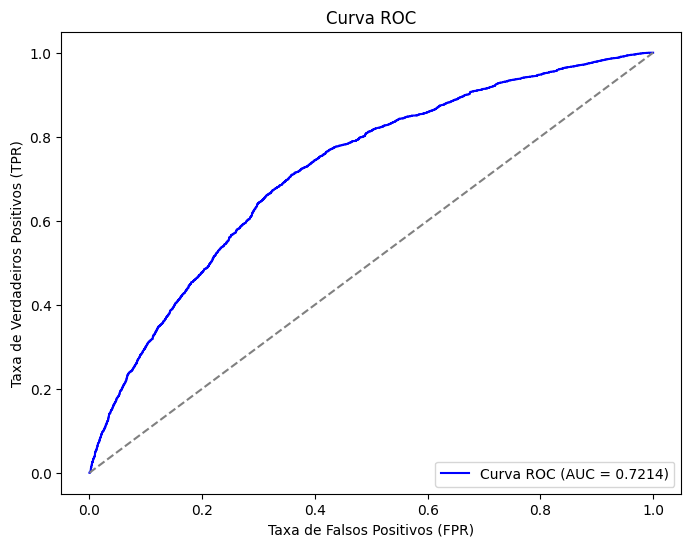

In [109]:
# Reinstanciando o modelo com os melhores parâmetros
model = LogisticRegression(C=100, max_iter=100)

# Treinando o modelo com os dados
model.fit(X_numeric_scaled, y)

# Calculando a acurácia no conjunto de treino
train_accuracy = model.score(X_numeric_scaled, y)
print(f"Acurácia no conjunto de treino: {train_accuracy:.4f}")

# Calculando a probabilidade de inadimplência para ROC-AUC
y_prob = model.predict_proba(X_numeric_scaled)[:, 1]

# Calculando o ROC-AUC
roc_auc = roc_auc_score(y, y_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Gerando a Curva ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


#### Regressão Logística

#### Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Instanciando o modelo
rf_model = RandomForestClassifier(random_state=42)

# Realizando a validação cruzada com o Random Forest
rf_scores = cross_val_score(rf_model, X_numeric_scaled, y, cv=5, scoring='accuracy')

# Exibindo os resultados
print(f"Acurácia média do Random Forest: {np.mean(rf_scores):.4f}")


Acurácia média do Random Forest: 0.6796


#### XGBoost

In [ ]:
%pip install xgboost

### XGBoost no conjunto de treino

Acurácia no conjunto de treino (XGBoost): 0.8039
ROC-AUC (XGBoost): 0.8856


c:\Users\PROFESSOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


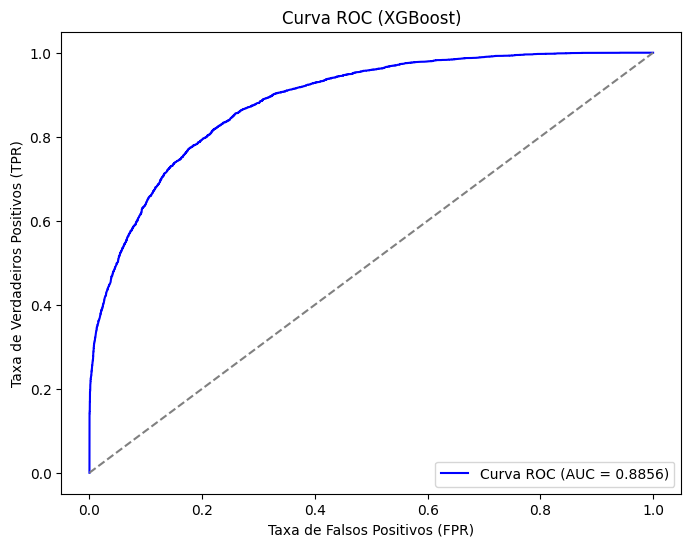

In [106]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Instanciando o modelo XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Treinando o modelo
xgb_model.fit(X_numeric_scaled, y)

# Previsões no conjunto de treino
y_pred = xgb_model.predict(X_numeric_scaled)
y_prob = xgb_model.predict_proba(X_numeric_scaled)[:, 1]

# Calculando a acurácia
train_accuracy = accuracy_score(y, y_pred)
print(f"Acurácia no conjunto de treino (XGBoost): {train_accuracy:.4f}")

# Calculando o ROC-AUC
roc_auc = roc_auc_score(y, y_prob)
print(f"ROC-AUC (XGBoost): {roc_auc:.4f}")

# Gerando a Curva ROC
fpr, tpr, thresholds = roc_curve(y, y_prob)

# Plotando a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC (XGBoost)')
plt.legend(loc='lower right')
plt.show()


### Validando no conjunto de testes

c:\Users\PROFESSOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\PROFESSOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\PROFESSOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\PROFESSOR\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:49:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia no conjunto de treino (XGBoost): 0.7959
ROC-AUC (XGBoost) no conjunto de treino: 0.8809


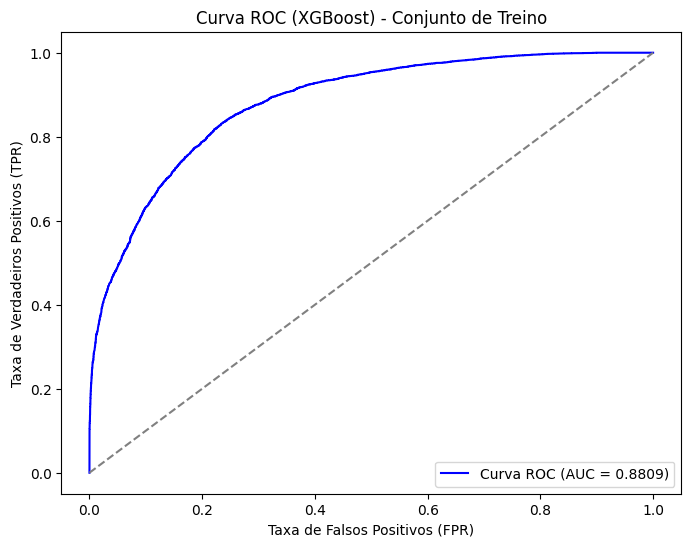

Acurácia no conjunto de teste (XGBoost): 0.7376
ROC-AUC (XGBoost) no conjunto de teste: 0.8470


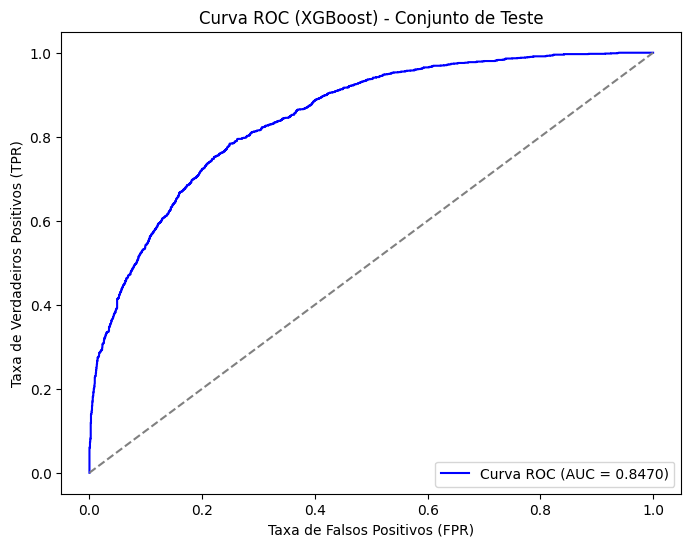

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import xgboost as xgb
import matplotlib.pyplot as plt

# Suponha que X e y já estejam definidos como seu conjunto de dados de treino e teste

# Definindo as colunas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Definindo as colunas numéricas
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Criando um pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Criando o pipeline com o pré-processador e o modelo XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42))
])

# Treinando o modelo
pipeline.fit(X, y)

# Previsões no conjunto de treino
y_pred_train = pipeline.predict(X)
y_prob_train = pipeline.predict_proba(X)[:, 1]

# Calculando a acurácia no conjunto de treino
train_accuracy = accuracy_score(y, y_pred_train)
print(f"Acurácia no conjunto de treino (XGBoost): {train_accuracy:.4f}")

# Calculando o ROC-AUC no conjunto de treino
roc_auc_train = roc_auc_score(y, y_prob_train)
print(f"ROC-AUC (XGBoost) no conjunto de treino: {roc_auc_train:.4f}")

# Gerando a Curva ROC no conjunto de treino
fpr_train, tpr_train, _ = roc_curve(y, y_prob_train)

# Plotando a Curva ROC no conjunto de treino
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='b', label=f'Curva ROC (AUC = {roc_auc_train:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC (XGBoost) - Conjunto de Treino')
plt.legend(loc='lower right')
plt.show()

# Validando no conjunto de teste
y_pred_test = pipeline.predict(X_test)  # Previsões para o conjunto de teste
y_prob_test = pipeline.predict_proba(X_test)[:, 1]  # Probabilidade para a curva ROC

# Calculando a acurácia no conjunto de teste
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no conjunto de teste (XGBoost): {test_accuracy:.4f}")

# Calculando o ROC-AUC no conjunto de teste
roc_auc_test = roc_auc_score(y_test, y_prob_test)
print(f"ROC-AUC (XGBoost) no conjunto de teste: {roc_auc_test:.4f}")

# Gerando a Curva ROC no conjunto de teste
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)

# Plotando a Curva ROC no conjunto de teste
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='b', label=f'Curva ROC (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC (XGBoost) - Conjunto de Teste')
plt.legend(loc='lower right')
plt.show()


##